### Import basic necessary libraries

In [24]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

### Sorting images from .csv file

In [25]:
'''
names = data['NAME'].unique()
images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
count = 0
for name in names:
    source_path = images_path + "\\" + name
    category = np.array(data.loc[data['NAME'] == name, 'Category'])[0]
    destination_path = images_path + "\\" + "in_csv" + "\\" + name
    
    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
    count += 1
    if count % 250 == 0:
        print(count)

print(count)
''';

In [26]:
data = pd.read_csv('mpii_dataset_clean_v2.csv')
data

,NAME,Activity,Category
0,015601864.jpg,curling,sports
1,015599452.jpg,curling,sports
2,005808361.jpg,curling,sports
3,086617615.jpg,curling,sports
4,060111501.jpg,curling,sports
...,...,...,...
17367,033474347.jpg,pushing car,transportation
17368,082650067.jpg,pushing car,transportation
17369,072772110.jpg,pushing car,transportation
17370,039361034.jpg,pushing car,transportation


In [27]:
data.Category.unique()

array(['sports', 'inactivity quiet-light', 'miscellaneous', 'occupation',
       'water activities', 'home activities', 'lawn and garden',
       'religious activities', 'winter activities',
       'conditioning exercise', 'bicycling', 'fishing and hunting',
       'dancing', 'walking', 'running', 'self care', 'home repair',
       'music playing', 'transportation', 'volunteer activities'],
      dtype=object)

In [1]:
'''
print(data.isnull().values.any())
print(data['Activity'].unique().shape)
print(data['Category'].unique().shape)
print(data['Activity'].unique())''';

### Image rescaling script (if necessary)

In [29]:
'''
from PIL import Image
import os, sys

path = ('..\Datasets\mpii_human_pose\human_pose_images')
dirs = os.listdir(path)
outpath  = (r'..\Datasets\mpii_human_pose\resized_images' + '\\')
count = 0
for item in dirs:
    count += 1
    obj = path + '\\' + item
    if os.path.isfile(obj):
        im = Image.open(obj)
        f, e = os.path.splitext(item)
        imResize = im.resize((256, 256), Image.ANTIALIAS)
        imResize.save(outpath + '\\' + f + '.jpeg', 'JPEG', quality=90)
        if count % 100 == 0:
            print(count)
            ''';

### Sorting images in corresponding folders.

In [30]:
x = data.drop('Category', axis=1)
y = data['Category']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, 
                                                 test_size = 0.20, random_state = 2)
x_train

,NAME,Activity
230,069597421.jpg,"sitting, talking in person, on the phone, comp..."
2141,073872315.jpg,"standing, arts and crafts, sand painting, carv..."
15789,058772539.jpg,"eating, sitting"
2386,069963957.jpg,"rowing, stationary"
10744,061143424.jpg,"bicycling, stationary"
...,...,...
14696,006110708.jpg,ballroom
1099,039090600.jpg,"irrigation channels, opening and closing ports"
11798,073432341.jpg,"water aerobics, water calisthenics"
6637,093874989.jpg,soccer


**Sorting in 'train' and 'test' folders. Only to be done once since seed value random_state=2 will always output the same distribution**


In [32]:
'''
names_train = x_train['NAME'].unique()
names_test = x_test['NAME'].unique()

names = np.concatenate((names_train, names_test), axis=0)

images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
count = 0
for name in names:
    source_path = images_path + "\\" + name
    if name in names_train:
        folder = 'train'
    elif name in names_test:
        folder = 'test'
        
    destination_path = images_path + "\\" + folder + "\\" + name
    
    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
    count += 1
    if count % 250 == 0:
        print(count)

print(count)
''';

**Sorting images in the different (20) category folders**

In [33]:
'''
# Repartir imágenes en carpetas-categorías

names_train = x_train['NAME'].unique()
names_test = x_test['NAME'].unique()

names = np.concatenate((names_train, names_test), axis=0)

images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
train_dir = os.path.join(images_path, "train")
test_dir =  os.path.join(images_path, "test")

categories = np.array(data['Category'].unique())

# Crear carpetas para categorías
#for category in categories:
#    os.mkdir(os.path.join(train_dir, category))
#    os.mkdir(os.path.join(test_dir, category))

count = 0
for name in names:
    category_image = np.array(data[data['NAME'] == name].Category)[0]

    if name in names_train:
        folder = 'train'
    elif name in names_test:
        folder = 'test'      
        
    source_path = os.path.join(images_path, folder, name)
    destination_path = os.path.join(images_path, folder, category_image, name)

    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
        
    count += 1
    if count % 250 == 0:
        print(count)
''';

# Convolutional Neural Network (CNN) Model

In [34]:
import tensorflow as tf

In [35]:
model = tf.keras.models.Sequential([
    # Desired size of the image 256x256 with 3 bytes color
    tf.keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(150, 150, 3)), # Mantener a 150x150
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(80, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),  # Meter cuarta capa de conv y maxpool o aumentar filtros en todas las capas
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(120, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten layer
    tf.keras.layers.Dropout(0.3),  # 0.25<dropout<0.5
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(20, activation='softmax')    
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 60)      1680      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 60)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 80)        43280     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 80)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 100)       72100     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 120)      

In [37]:
from tensorflow.keras.optimizers import RMSprop

SGD_opt = tf.keras.optimizers.SGD(learning_rate=0.01, 
                                  momentum=0.9)

model.compile(optimizer = SGD_opt, #SGD con momentum (sin SGD estoy encontrando puntos de silla)
              loss = 'categorical_crossentropy', # Probar 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

In [38]:
images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
train_dir = os.path.join(images_path, "train")
test_dir =  os.path.join(images_path, "test")

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,         # Hacer Data augmentation
                                   #featurewise_center = True,
                                   #featurewise_std_normalization = True,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size =(150,150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 20,
                                                 class_mode = 'categorical', 
                                                  target_size = (150,150))

Found 13897 images belonging to 20 classes.
Found 3475 images belonging to 20 classes.


In [42]:
history = model.fit(train_generator, validation_data = test_generator,
                    #steps_per_epoch = 1200, 
                    epochs = 100, # epochs a 100
                    #validation_steps = 50, 
                    verbose = 1)

Epoch 1/100
695/695 [==============================] - 959s 1s/step - loss: 2.6005 - accuracy: 0.1970 - val_loss: 2.5927 - val_accuracy: 0.2009
Epoch 2/100
695/695 [==============================] - 874s 1s/step - loss: 2.5352 - accuracy: 0.2023 - val_loss: 2.5149 - val_accuracy: 0.1862
Epoch 3/100
695/695 [==============================] - 791s 1s/step - loss: 2.5056 - accuracy: 0.2123 - val_loss: 2.5030 - val_accuracy: 0.2098
Epoch 4/100
695/695 [==============================] - 865s 1s/step - loss: 2.4442 - accuracy: 0.2297 - val_loss: 2.4675 - val_accuracy: 0.2319
Epoch 5/100
695/695 [==============================] - 815s 1s/step - loss: 2.3927 - accuracy: 0.2434 - val_loss: 2.3955 - val_accuracy: 0.2305
Epoch 6/100
695/695 [==============================] - 804s 1s/step - loss: 2.3488 - accuracy: 0.2516 - val_loss: 2.3250 - val_accuracy: 0.2584
Epoch 7/100
695/695 [==============================] - 823s 1s/step - loss: 2.3078 - accuracy: 0.2638 - val_loss: 2.2810 - val_accuracy:

In [58]:
model.save(r"saved\primera_CNN.h5")

In [49]:
model.evaluate(test_generator)  #REDUNDANTE. Ya se hace durante el entrenamiento (fase final por epoch)

174/174 [==============================] - 86s 492ms/step - loss: 1.6261 - accuracy: 0.5065


[1.6261372566223145, 0.5064747929573059]

### Testing save and load model

In [54]:
model_from_file = tf.keras.models.load_model('saved/primera_CNN.h5')

In [55]:
model_from_file.evaluate(test_generator)

174/174 [==============================] - 86s 497ms/step - loss: 1.6261 - accuracy: 0.5065


[1.626137137413025, 0.5064747929573059]

### Plotting training and validation metrics

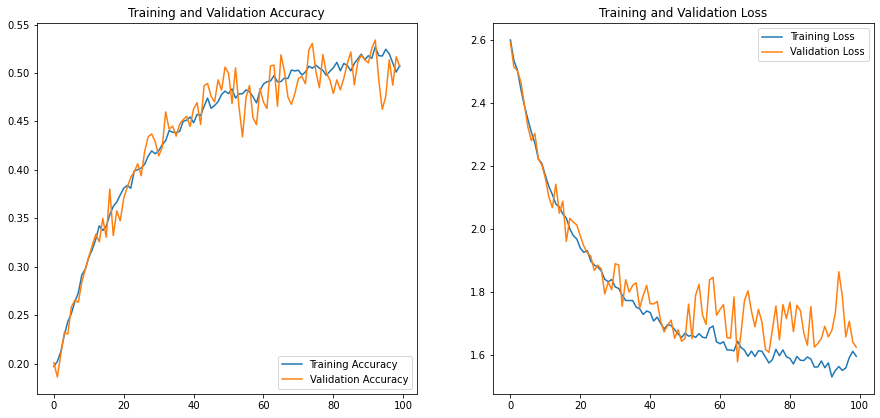

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Draft - Model evaluation with random image

In [2]:
# Escribir email a Roberto para ver cómo pasar imágenes a la red para evaluarla
'''from tensorflow.keras.preprocessing import image

imgpath = 'fut1.jpg'
imagen = image.load_img(imgpath, target_size=(256,256))

w = image.img_to_array(imagen)
w = np.expand_dims(x, axis=0)   # Mirar documentación de la función
w = np.expand_dims(x, axis=0)
imagenes = np.vstack([w])

classes = model.predict(w, batch_size=20)

print(classes[0])''';